# <ul> Data preprocessing - Ahmed Ibrahim

In [62]:
#imporatant librabaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
# READ THE DATA and DISPLAY THE HEAD
df=pd.read_csv("OctData3.csv")
df.head(5)

,Percen,Mon,Mark,target
0,1.244076,1.532604e+07,45.649624,1
1,2.511102,1.076490e+07,49.428441,0
2,1.391966,7.494251e+06,37.825561,1
3,1.289790,1.083943e+07,39.239650,1
4,7.440627,1.436223e+07,51.374700,1


In [64]:
df["Percen"] = df["Percen"]  * 1000000
df["Mon"]    = df["Mon"]  * 1000000
df["Mark"]   = df["Mark"]  * 1000000

In [65]:
df["target"].value_counts()

,count
target,
1,374
0,130


In [66]:
x,y= df.shape
print("The data is consist of {} records ".format(x))
print("The features are {}".format(y))

The data is consist of 504 records 
The features are 4


In [67]:
# APPLY SOME EDA FOR THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Percen  504 non-null    float64
 1   Mon     504 non-null    float64
 2   Mark    504 non-null    float64
 3   target  504 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.9 KB


In [68]:
# find th null values precentage %
df.isnull().sum()/df.shape[0]*100

,0
Percen,0.0
Mon,0.0
Mark,0.0
target,0.0


In [69]:
# find the duplicated values as percentage %
df.duplicated().sum()/df.shape[0]*100

0.0

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Percen,504.0,7.855566e+06,1.558779e+07,1.010123e+06,1.671872e+06,2.406677e+06,5.691398e+06,7.954271e+07
Mon,504.0,1.409885e+13,1.366141e+13,5.522924e+11,6.096837e+12,1.130212e+13,1.702366e+13,7.919976e+13
Mark,504.0,4.481568e+07,5.846716e+06,3.500665e+07,3.951031e+07,4.482875e+07,4.994925e+07,5.494156e+07
target,504.0,7.420635e-01,4.379335e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [71]:
# gabage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('########'*10)

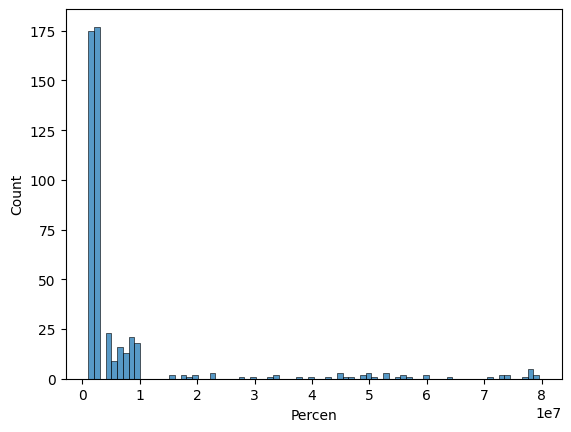

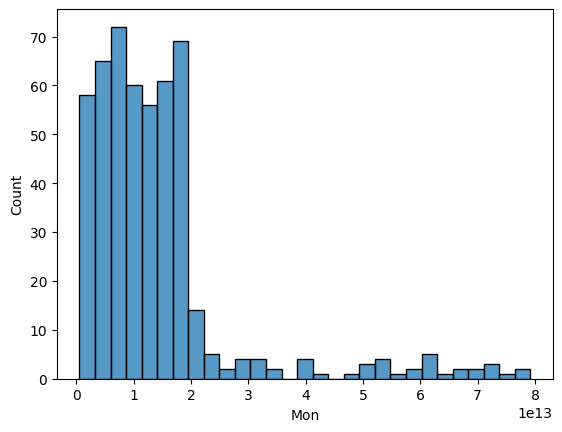

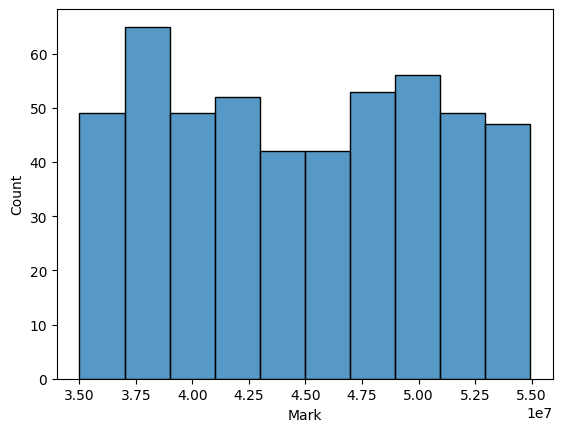

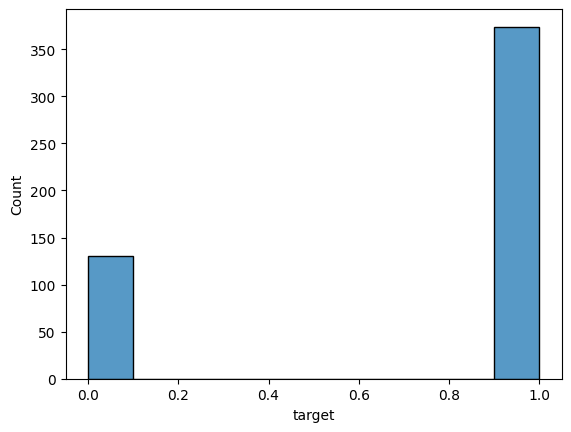

In [72]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

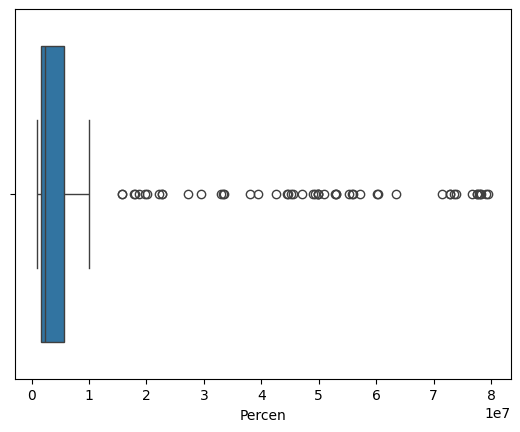

<Figure size 2000x2000 with 0 Axes>

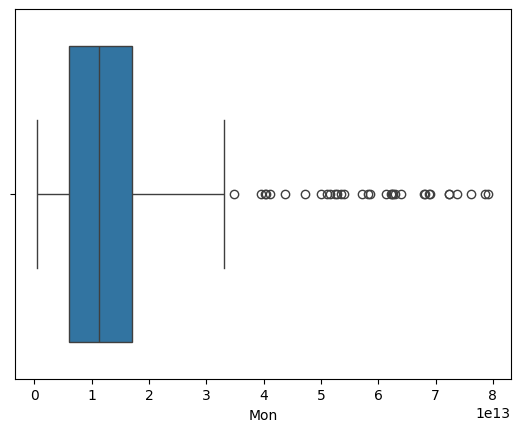

<Figure size 2000x2000 with 0 Axes>

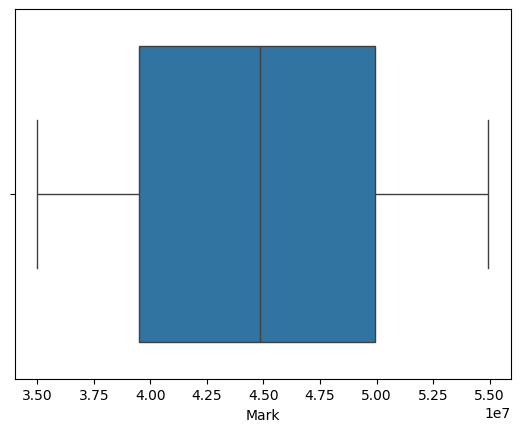

<Figure size 2000x2000 with 0 Axes>

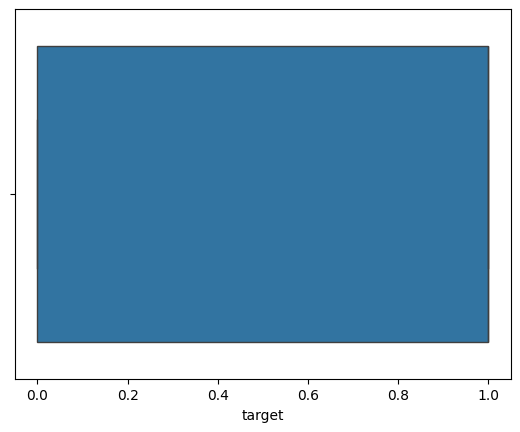

<Figure size 2000x2000 with 0 Axes>

In [73]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.figure(figsize=(20,20))
    plt.show()

In [58]:
df.select_dtypes(include="number").columns

Index(['Percen', 'Mon', 'Mark', 'target'], dtype='object')

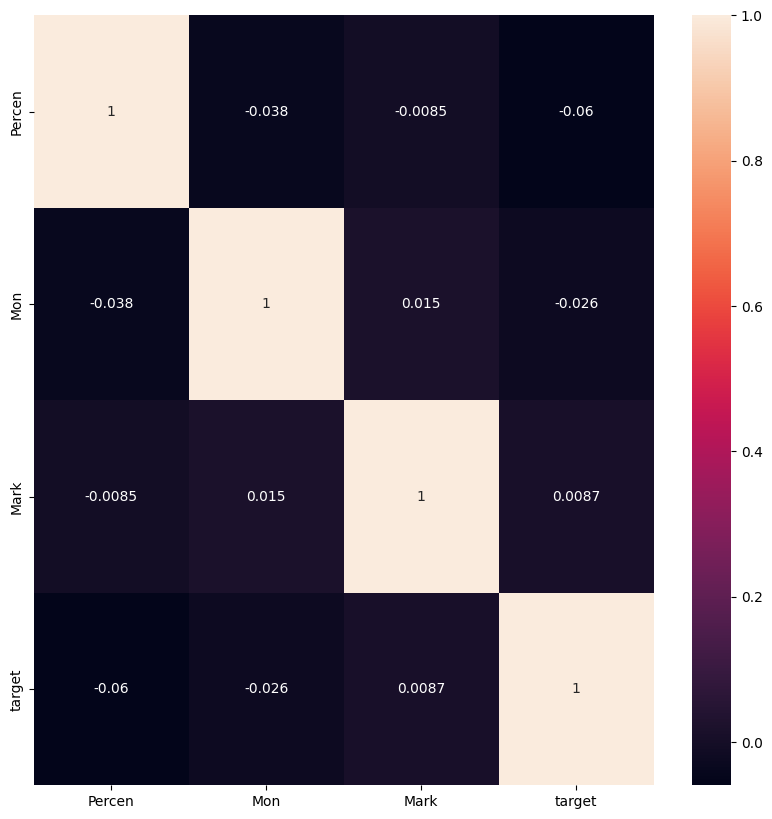

In [79]:
#correlation with heatmap
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)
plt.show()

In [76]:
 #missing value treatments
from sklearn.impute import KNNImputer
impute=KNNImputer()


In [77]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [83]:
df.isnull().sum()

,0
Percen,0
Mon,0
target,0


In [81]:
df.drop(["Mark"] , axis=1 , inplace=True)

In [84]:
################

# handel outlier for coloms [ amount oldbalanceOrg oldbalanceDes ]

def handle_outliers_iqr(df, columns):
  """Handles outliers using the Interquartile Range (IQR) method for specified columns in a DataFrame.

  Args:
    df: The pandas DataFrame containing the data.
    columns: A list of column names to handle outliers for.
  """

  for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the nearest bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

  return df


# Example usage with your DataFrame
columns_to_handle = ['Percen' , 'Mon']
df = handle_outliers_iqr(df, columns_to_handle)

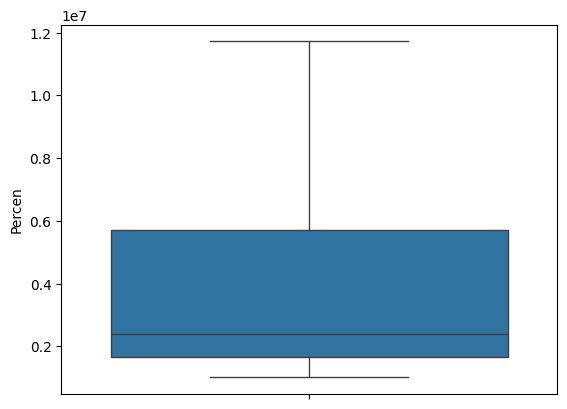

<Figure size 1000x1000 with 0 Axes>

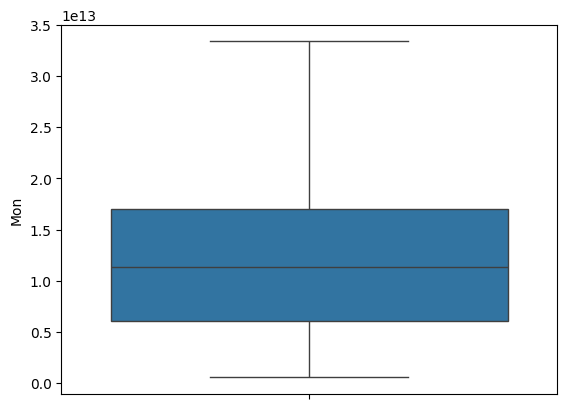

<Figure size 1000x1000 with 0 Axes>

In [87]:
 for i in ['Percen' , 'Mon']:
     sns.boxplot(df[i])
     plt.figure(figsize=(10,10))
     plt.show()

In [94]:
df['Percen'].astype(np.float128)
df['Mon'].astype(np.float128)

,Mon
0,1.532604e+13
1,1.076490e+13
2,7.494251e+12
3,1.083943e+13
4,1.436223e+13
...,...
499,1.243814e+13
500,8.357264e+12
501,1.773793e+13
502,8.302748e+12


In [97]:
df["target"].astype(int)

,target
0,1
1,0
2,1
3,1
4,1
...,...
499,1
500,1
501,1
502,0


In [98]:
df["target"].unique()

array([1., 0.])

In [99]:
df.isnull().sum()

,0
Percen,0
Mon,0
target,0


</ul>

# <u> Machine Learning By Mostafa Sobhy </ul>

* ## <u>Import important library</u>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* ## <u>Applay minMax scaler</u>

In [102]:
#applay minMax scaler

from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame and you want to scale numerical features
numerical_features = ['Percen' , 'Mon']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now your specified columns are scaled between 0 and 1

* ## <u>Oversampling using SMOTE</u>

In [139]:
df.to_csv("data.csv" , index=False)

In [104]:
x = df.drop(["target"] , axis=1)
y = df["target"]

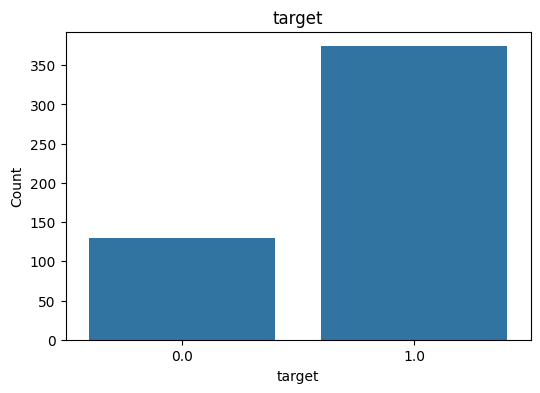

In [143]:
# Visualize the class distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

In [144]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [145]:
# Resample Data

# Create a new DataFrame with resampled data
df_resampled = pd.concat([pd.DataFrame(x_resampled), pd.DataFrame(y_resampled, columns=['target'])], axis=1)

# Check the class distribution after oversampling
isFraud_resampled = df_resampled['target'].value_counts()

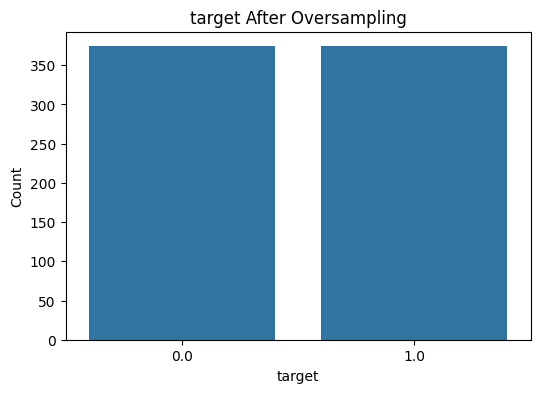

In [146]:
# Visualize the class distribution after oversampling

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_resampled)
plt.title('target After Oversampling')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

* ## <u>Spilting Data</u>

In [113]:
# Separate features and target variable
x = df_resampled.drop('target', axis=1)
y = df_resampled['target']

In [148]:
df_resampled.to_csv("data_resampled.csv" , index=False)

* ## <u>Feature Engineering</u>

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x, y)
feature_importances = rf_model.feature_importances_

In [115]:
# Create a DataFrame to display feature importances

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame

print(feature_importance_df)

  Feature  Importance
1     Mon    0.522594
0  Percen    0.477406


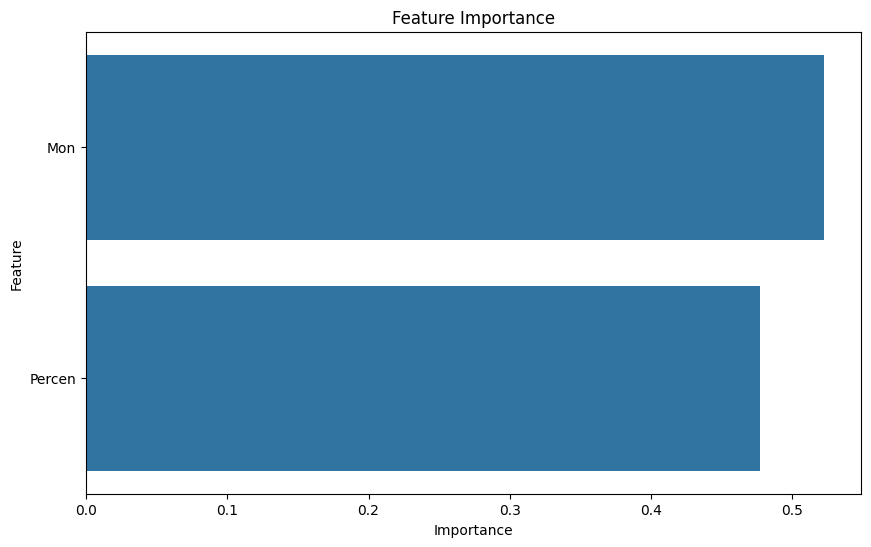

In [116]:
# Plot feature importances

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

* ## <u>train_test_split</u>

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

* ## <u>Storing Model Data for visualization and Compare  </u>

In [118]:
Model_Name_all = ["LogisticRegression"  , "DecisionTreeClassifier" , "RandomForestClassifier" , "GradientBoostingClassifier" , "KNeighborsClassifier"]
accuracy_all = []
recall_all = []
f1_all = []
precision_all = []

* ## <u>Import Models</u>

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , recall_score , f1_score , precision_score ,confusion_matrix , classification_report

* ## <u>LogisticRegression Model</u>

In [120]:
# Train Model
model_lg = LogisticRegression()
model_lg.fit(x_train, y_train)
model_lg.score(x_train, y_train)
y_pred_lg = model_lg.predict(x_test)
model_lg.predict_proba(x_test)

array([[0.48137175, 0.51862825],
       [0.59356918, 0.40643082],
       [0.49338114, 0.50661886],
       [0.47890416, 0.52109584],
       [0.51288015, 0.48711985],
       [0.4763875 , 0.5236125 ],
       [0.4905869 , 0.5094131 ],
       [0.4840912 , 0.5159088 ],
       [0.46212527, 0.53787473],
       [0.55728668, 0.44271332],
       [0.54191968, 0.45808032],
       [0.47020267, 0.52979733],
       [0.54491072, 0.45508928],
       [0.55599766, 0.44400234],
       [0.51794983, 0.48205017],
       [0.4445883 , 0.5554117 ],
       [0.56034278, 0.43965722],
       [0.51373697, 0.48626303],
       [0.51709106, 0.48290894],
       [0.48269241, 0.51730759],
       [0.44210929, 0.55789071],
       [0.5712258 , 0.4287742 ],
       [0.53631449, 0.46368551],
       [0.44973157, 0.55026843],
       [0.49671891, 0.50328109],
       [0.55569093, 0.44430907],
       [0.48659088, 0.51340912],
       [0.59287526, 0.40712474],
       [0.46371582, 0.53628418],
       [0.51113221, 0.48886779],
       [0.

Accuracy Score Is: 0.6066666666666667
Recall Score Is: 0.5584415584415584
F1 Score Is: 0.593103448275862
Precision Score Is: 0.6323529411764706
LogisticRegression Report Is:
               precision    recall  f1-score   support

         0.0       0.59      0.66      0.62        73
         1.0       0.63      0.56      0.59        77

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.61      0.61      0.61       150



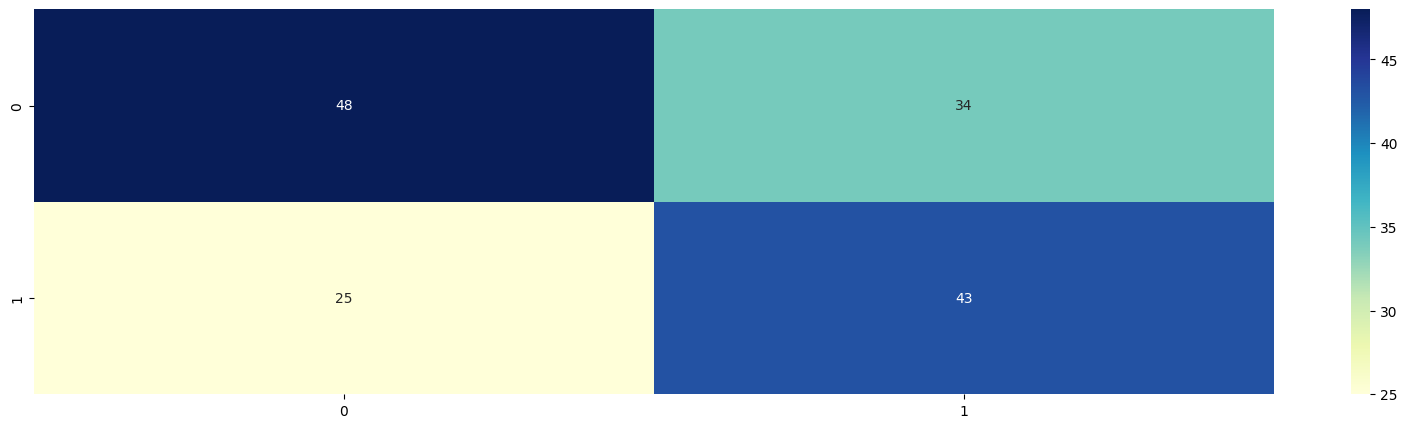

In [121]:
# Evaluate the model
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
confusion_lg = confusion_matrix(y_test, y_pred_lg)
report_lg = classification_report(y_test, y_pred_lg)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_lg , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_lg)
print("Recall Score Is:" , recall_lg)
print("F1 Score Is:", f1_lg)
print("Precision Score Is:" , precision_lg)
print("LogisticRegression Report Is:\n" , report_lg)
plt.show()

In [122]:
# storing model data
accuracy_all.append(accuracy_lg)
recall_all.append(recall_lg)
f1_all.append(f1_lg)
precision_all.append(precision_lg)

In [123]:
import statsmodels.api as sm

x_train_with_constant = sm.add_constant(x_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, x_train_with_constant).fit()

# Print the model summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.688795
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  598
Model:                          Logit   Df Residuals:                      595
Method:                           MLE   Df Model:                            2
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:                0.006247
Time:                        14:34:00   Log-Likelihood:                -411.90
converged:                       True   LL-Null:                       -414.49
Covariance Type:            nonrobust   LLR p-value:                   0.07508
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2964      0.163      1.815      0.070      -0.024       0.617
Percen        -0.4259      0.

* ## <u>DecisionTreeClassifier Model</u>

In [124]:
# Train Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)
model_dt.score(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)
model_dt.predict_proba(x_test)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

Accuracy Score Is: 0.5866666666666667
Recall Score Is: 0.6493506493506493
F1 Score Is: 0.6172839506172839
Precision Score Is: 0.5882352941176471
DecisionTree Report Is:
               precision    recall  f1-score   support

         0.0       0.58      0.52      0.55        73
         1.0       0.59      0.65      0.62        77

    accuracy                           0.59       150
   macro avg       0.59      0.58      0.58       150
weighted avg       0.59      0.59      0.58       150



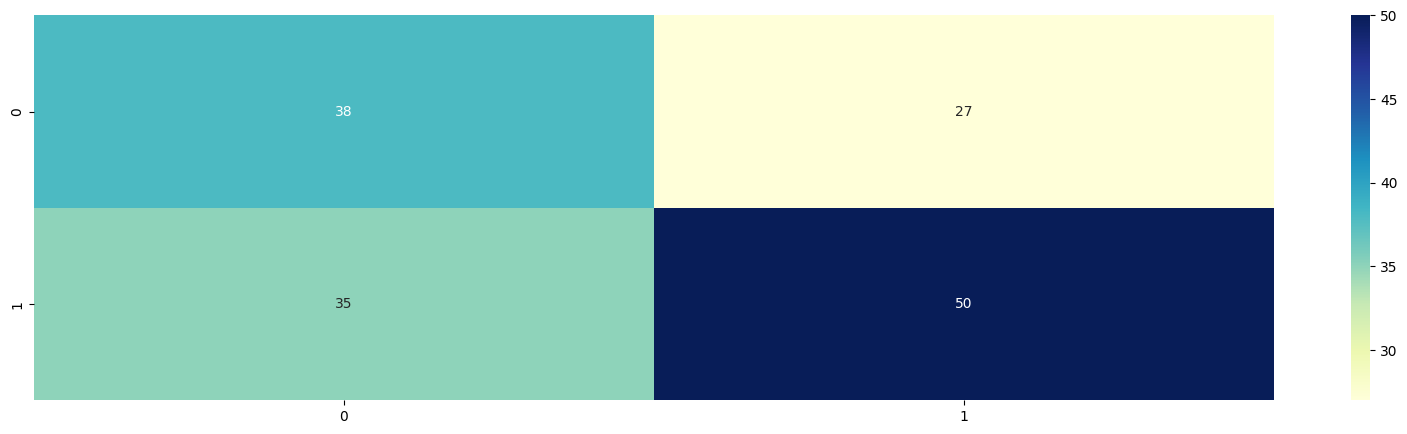

In [125]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_dt , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_dt)
print("Recall Score Is:" , recall_dt)
print("F1 Score Is:", f1_dt)
print("Precision Score Is:" , precision_dt)
print("DecisionTree Report Is:\n" , report_dt)
plt.show()

In [126]:
# storing model data
accuracy_all.append(accuracy_dt)
recall_all.append(recall_dt)
f1_all.append(f1_dt)
precision_all.append(precision_dt)

* ## <u>RandomForestClassifier Model</u>

In [127]:
# Train Model
model_RanF = RandomForestClassifier(random_state=42)
model_RanF.fit(x_train, y_train)
model_RanF.score(x_train, y_train)
y_pred_RanF = model_RanF.predict(x_test)
model_RanF.predict_proba(x_test)

array([[0.68, 0.32],
       [0.7 , 0.3 ],
       [0.71, 0.29],
       [0.44, 0.56],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.21, 0.79],
       [0.79, 0.21],
       [0.52, 0.48],
       [0.34, 0.66],
       [0.38, 0.62],
       [0.65, 0.35],
       [0.95, 0.05],
       [0.33, 0.67],
       [0.86, 0.14],
       [0.02, 0.98],
       [0.52, 0.48],
       [0.39, 0.61],
       [0.45, 0.55],
       [0.57, 0.43],
       [0.28, 0.72],
       [0.8 , 0.2 ],
       [0.15, 0.85],
       [0.31, 0.69],
       [0.54, 0.46],
       [0.36, 0.64],
       [0.57, 0.43],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.81, 0.19],
       [0.31, 0.69],
       [0.11, 0.89],
       [0.98, 0.02],
       [0.25, 0.75],
       [0.51, 0.49],
       [0.23, 0.77],
       [0.26, 0.74],
       [0.87, 0.13],
       [0.32, 0.68],
       [0.13, 0.87],
       [0.7 , 0.3 ],
       [0.18, 0.82],
       [0.21, 0.79],
       [0.82, 0.18],
       [0.75, 0.25],
       [0.81, 0.19],
       [0.2 , 0.8 ],
       [0.87,

Accuracy Score Is: 0.6333333333333333
Recall Score Is: 0.6753246753246753
F1 Score Is: 0.6540880503144654
Precision Score Is: 0.6341463414634146
RandomForest Report Is:
               precision    recall  f1-score   support

         0.0       0.63      0.59      0.61        73
         1.0       0.63      0.68      0.65        77

    accuracy                           0.63       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.63      0.63      0.63       150



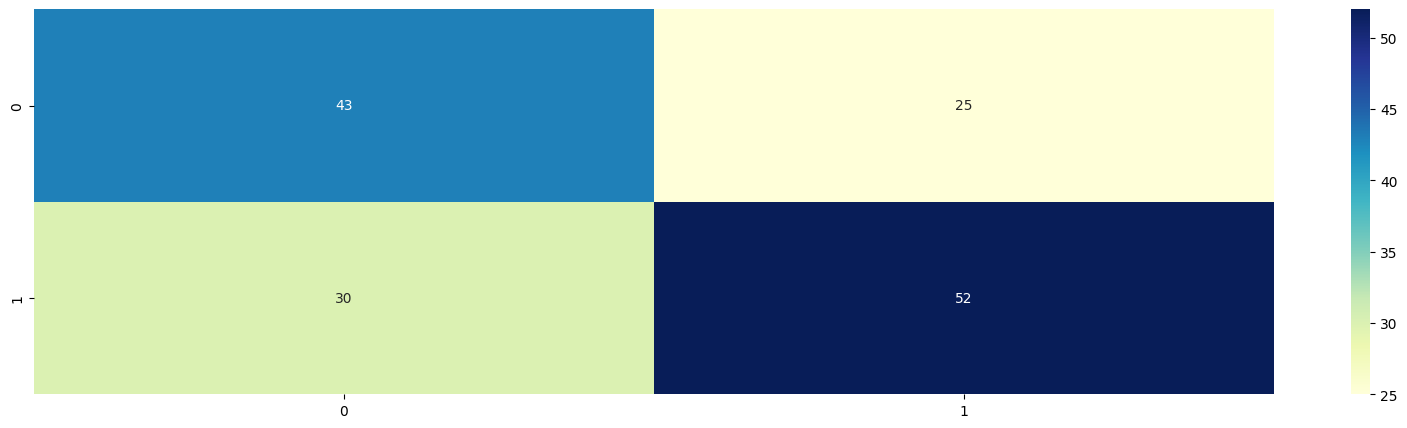

In [128]:
# Evaluate the model
accuracy_RanF = accuracy_score(y_test, y_pred_RanF)
precision_RanF = precision_score(y_test, y_pred_RanF)
recall_RanF = recall_score(y_test, y_pred_RanF)
f1_RanF = f1_score(y_test, y_pred_RanF)
confusion_RanF = confusion_matrix(y_test, y_pred_RanF)
report_RanF = classification_report(y_test, y_pred_RanF)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_RanF , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_RanF)
print("Recall Score Is:" , recall_RanF)
print("F1 Score Is:", f1_RanF)
print("Precision Score Is:" , precision_RanF)
print("RandomForest Report Is:\n" , report_RanF)
plt.show()

In [129]:
# storing model data
accuracy_all.append(accuracy_RanF)
recall_all.append(recall_RanF)
f1_all.append(f1_RanF)
precision_all.append(precision_RanF)

* ## <u>GradientBoostingClassifier Model</u>

In [130]:
# Train Model
model_Grad = GradientBoostingClassifier(random_state=42)
model_Grad.fit(x_train, y_train)
model_Grad.score(x_train, y_train)
y_pred_Grad = model_Grad.predict(x_test)
model_Grad.predict_proba(x_test)

array([[0.72688865, 0.27311135],
       [0.69339179, 0.30660821],
       [0.77562621, 0.22437379],
       [0.25403839, 0.74596161],
       [0.14183269, 0.85816731],
       [0.59923588, 0.40076412],
       [0.28270949, 0.71729051],
       [0.6884792 , 0.3115208 ],
       [0.64436976, 0.35563024],
       [0.36364771, 0.63635229],
       [0.25923838, 0.74076162],
       [0.42455119, 0.57544881],
       [0.85324422, 0.14675578],
       [0.42439262, 0.57560738],
       [0.66231203, 0.33768797],
       [0.04304634, 0.95695366],
       [0.30616557, 0.69383443],
       [0.73774598, 0.26225402],
       [0.64729037, 0.35270963],
       [0.36177461, 0.63822539],
       [0.27778882, 0.72221118],
       [0.58237549, 0.41762451],
       [0.26116942, 0.73883058],
       [0.2152301 , 0.7847699 ],
       [0.53538493, 0.46461507],
       [0.5606051 , 0.4393949 ],
       [0.5125477 , 0.4874523 ],
       [0.54083825, 0.45916175],
       [0.58235425, 0.41764575],
       [0.78090597, 0.21909403],
       [0.

Accuracy Score Is: 0.5733333333333334
Recall Score Is: 0.5844155844155844
F1 Score Is: 0.5844155844155844
Precision Score Is: 0.5844155844155844
GradientBoosting Report Is:
               precision    recall  f1-score   support

         0.0       0.56      0.56      0.56        73
         1.0       0.58      0.58      0.58        77

    accuracy                           0.57       150
   macro avg       0.57      0.57      0.57       150
weighted avg       0.57      0.57      0.57       150



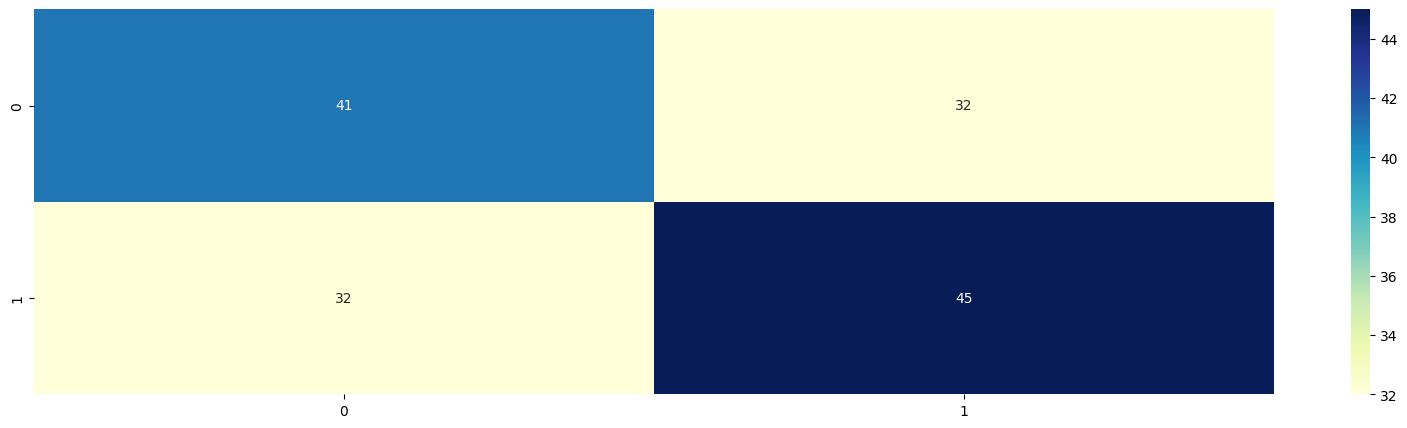

In [131]:
# Evaluate the model
accuracy_Grad = accuracy_score(y_test, y_pred_Grad)
precision_Grad = precision_score(y_test, y_pred_Grad)
recall_Grad = recall_score(y_test, y_pred_Grad)
f1_Grad = f1_score(y_test, y_pred_Grad)
confusion_Grad = confusion_matrix(y_test, y_pred_Grad)
report_Grad = classification_report(y_test, y_pred_Grad)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_Grad , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_Grad)
print("Recall Score Is:" , recall_Grad)
print("F1 Score Is:", f1_Grad)
print("Precision Score Is:" , precision_Grad)
print("GradientBoosting Report Is:\n" , report_Grad)
plt.show()

In [132]:
# storing model data
accuracy_all.append(accuracy_Grad)
recall_all.append(recall_Grad)
f1_all.append(f1_Grad)
precision_all.append(precision_Grad)

* ## <u>KNeighborsClassifier Model</u>

In [133]:
# Train Model
model_KN = KNeighborsClassifier(n_neighbors=5)
model_KN.fit(x_train, y_train)
model_KN.score(x_train, y_train)
y_pred_KN = model_KN.predict(x_test)
model_KN.predict_proba(x_test)

array([[0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8,

Accuracy Score Is: 0.6133333333333333
Recall Score Is: 0.4675324675324675
F1 Score Is: 0.5538461538461539
Precision Score Is: 0.6792452830188679
KNeighbors Report Is:
               precision    recall  f1-score   support

         0.0       0.58      0.77      0.66        73
         1.0       0.68      0.47      0.55        77

    accuracy                           0.61       150
   macro avg       0.63      0.62      0.61       150
weighted avg       0.63      0.61      0.60       150



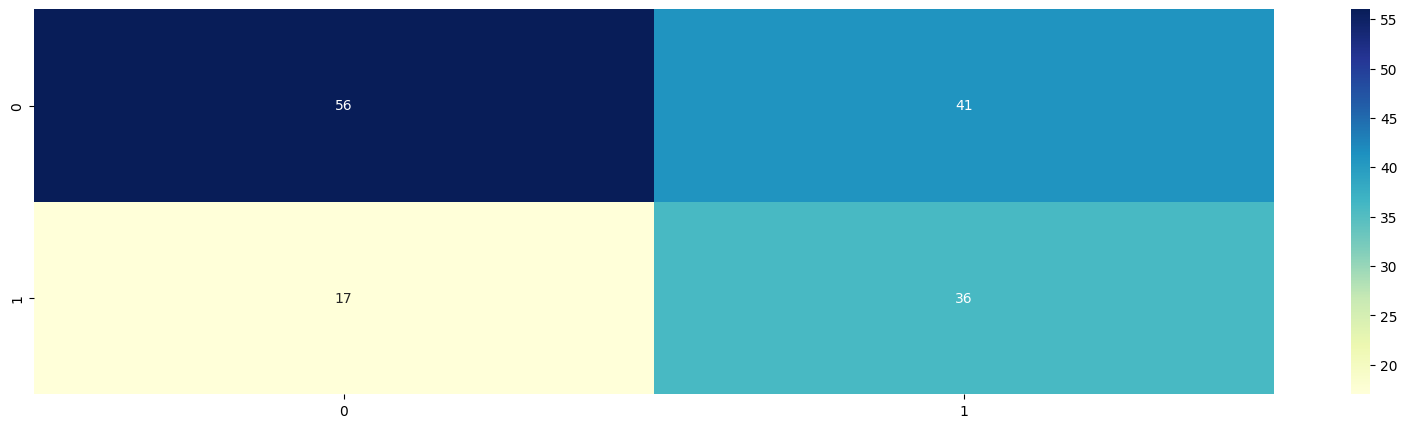

In [134]:
# Evaluate the model
accuracy_KN = accuracy_score(y_test, y_pred_KN)
precision_KN = precision_score(y_test, y_pred_KN)
recall_KN = recall_score(y_test, y_pred_KN)
f1_KN = f1_score(y_test, y_pred_KN)
confusion_KN = confusion_matrix(y_test, y_pred_KN)
report_KN = classification_report(y_test, y_pred_KN)

plt.figure(figsize=(20,5))
sns.heatmap(confusion_matrix(y_pred_KN , y_test) , annot=True , cmap="YlGnBu")
print("Accuracy Score Is:" , accuracy_KN)
print("Recall Score Is:" , recall_KN)
print("F1 Score Is:", f1_KN)
print("Precision Score Is:" , precision_KN)
print("KNeighbors Report Is:\n" , report_KN)
plt.show()

In [135]:
# storing model data
accuracy_all.append(accuracy_KN)
recall_all.append(recall_KN)
f1_all.append(f1_KN)
precision_all.append(precision_KN)

* ## <u>Ploting Model data and Compare</u>

In [136]:
final_all = pd.DataFrame({"Modele Name": Model_Name_all, "accuracy ": accuracy_all, "Recall ": recall_all, "F1 ": f1_all, "Precision ": precision_all})

final_all.style.background_gradient(cmap="YlGnBu", axis=0)

,Modele Name,accuracy,Recall,F1,Precision
0,LogisticRegression,0.606667,0.558442,0.593103,0.632353
1,DecisionTreeClassifier,0.586667,0.649351,0.617284,0.588235
2,RandomForestClassifier,0.633333,0.675325,0.654088,0.634146
3,GradientBoostingClassifier,0.573333,0.584416,0.584416,0.584416
4,KNeighborsClassifier,0.613333,0.467532,0.553846,0.679245


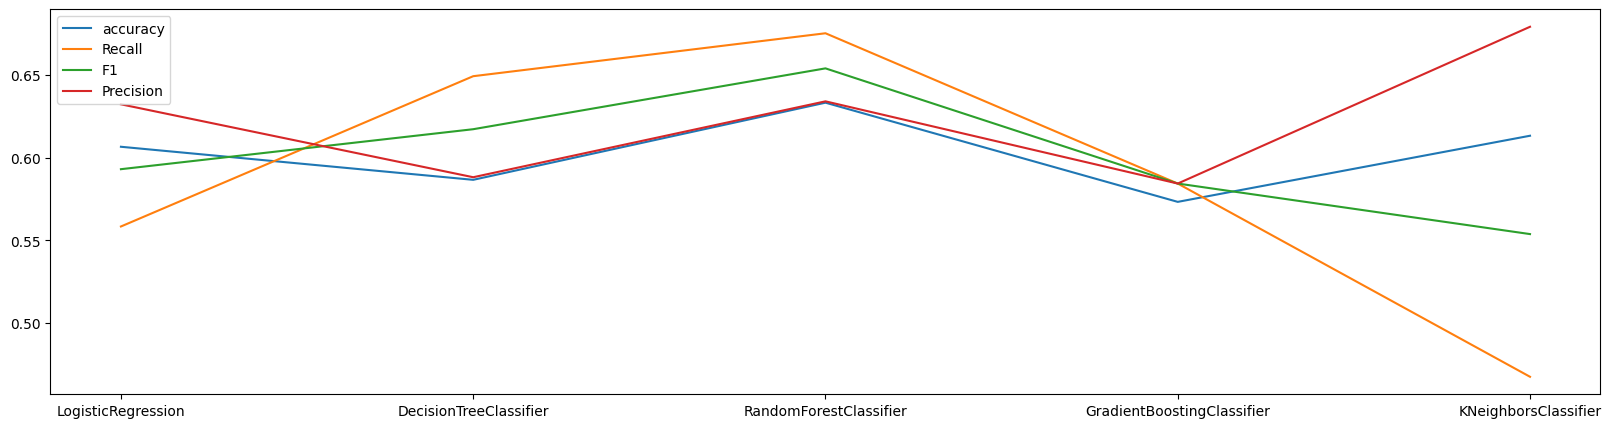

In [137]:
fig ,ax = plt.subplots(figsize=(20,5))

plt.plot(final_all["Modele Name"] , accuracy_all , label="accuracy" )
plt.plot(final_all["Modele Name"] , recall_all , label="Recall" )
plt.plot(final_all["Modele Name"] , f1_all , label="F1" )
plt.plot(final_all["Modele Name"] , precision_all , label="Precision" )

plt.legend()
plt.show()

* ## <u>Saveing Model</u>

In [ ]:
import pickle

filename = "Fraud_RandomForest.sav"
pickle.dump(model_RanF , open(filename,"wb"))